In [61]:
from __future__ import print_function 
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(2)

In [62]:
means = [[-1, 0], [1, 0]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N)
print(X0)
X1 = np.random.multivariate_normal(means[1], cov, N)

X = np.concatenate((X0, X1), axis = 0)
print('X :',X)
y = np.concatenate((np.ones(N), -1*np.ones(N)))
print('y :',y)

Xbar = np.concatenate((np.ones((2*N, 1)), X), axis = 1)
print('Xbar :',Xbar)


[[-0.77903943  0.19579728]
 [-0.29867766  1.43487375]
 [ 0.08493823  0.70849736]
 [-0.97298583 -0.52989559]
 [-0.26776361  0.32571583]
 [-1.78828032  0.23682627]
 [-0.77079397 -0.27074543]
 [-1.1362238  -0.40283452]
 [-1.25317301  0.27230351]
 [-0.62808263  0.37595358]]
X : [[-0.77903943  0.19579728]
 [-0.29867766  1.43487375]
 [ 0.08493823  0.70849736]
 [-0.97298583 -0.52989559]
 [-0.26776361  0.32571583]
 [-1.78828032  0.23682627]
 [-0.77079397 -0.27074543]
 [-1.1362238  -0.40283452]
 [-1.25317301  0.27230351]
 [-0.62808263  0.37595358]
 [ 1.47403369  0.4040742 ]
 [ 1.09281249 -0.34938294]
 [ 1.22222334  0.11659863]
 [ 1.58438569  0.05326933]
 [ 1.74493118  0.67628604]
 [ 0.6355797   0.63347726]
 [ 2.19217738  1.2425902 ]
 [ 0.51075436  0.11880111]
 [ 0.93784332 -0.43970053]
 [ 0.8787214   0.12126884]]
y : [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.]
Xbar : [[ 1.         -0.77903943  0.19579728]
 [ 1.         -0.29867766  1.43487375]
 [ 1.       

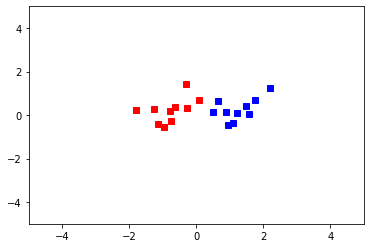

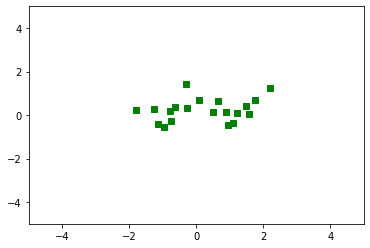

In [63]:
plt.plot(X0[:,0],X0[:,1],'rs')
plt.plot(X1[:,0],X1[:,1],'bs')
plt.axis([-5, 5, -5, 5])
plt.show()

plt.plot(Xbar[:,1], Xbar[:,2],'gs')
plt.axis([-5, 5, -5, 5])
plt.show()

In [64]:
def predict(w, X):  
    '''
    predict label of each row of X, given w 
    X: a 2-d numpy array of shape (N, d), each row is a datapoint 
    w_init: a 1-d numpy array of shape (d)
    '''

    return np.sign(X.dot(w))

def perceptron(X, y, w_init):
    '''
    perform perceptron learning algorithm
    X: a 2-d numpy array of shape (N, d), each row is a datapoint 
    y: a 1-d numpy array of shape (N), label of each row of X. y[i] = 1/-1
    w_init: a 1-d numpy array of shape (d)
    
    '''
    w = w_init
    while True:
        pred = predict(w, X)
        # find indexes of misclassified points
        mis_idxs = np.where(np.equal(pred, y) == False)[0]
        # number of misclassified points
        num_mis = mis_idxs.shape[0]
        if num_mis == 0:
            return w
        # random pick one misclassified point 
        random_id = np.random.choice(mis_idxs, 1)[0]
        # update w 
        w = w + y[random_id]*X[random_id]

np.random.seed(73)
# Xbar 

w_init = np.random.randn(Xbar.shape[1])
w = perceptron(Xbar, y, w_init)

print('w :',w)
print(Xbar.dot(w))

w : [ 0.57681305 -2.52654515  1.61348129]
[ 2.86100659  3.64657758  1.50536002  2.18012906  1.77886629  5.47709877
  2.08741613  2.79756782  4.18236786  2.77028625 -2.49543346 -2.74794989
 -2.32305969 -3.34025986 -2.74065949 -0.00690404 -2.95692603 -0.52194753
 -2.50213901 -1.44765123]


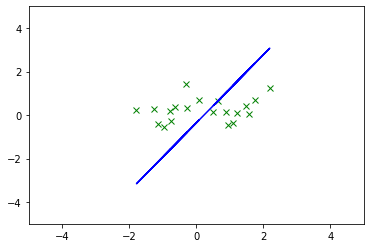

In [70]:
a = -(w[0]+w[1]*Xbar[:,1])/w[2]
plt.plot(Xbar[:,1], Xbar[:,2],'gx')
plt.plot(Xbar[:,1],a,'-b')
plt.axis([-5, 5, -5, 5])
plt.show()
